# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [69]:
#!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
3#!unzip bus-breakdown-and-delays.zip

3

## Importing Libraries

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [71]:
df = pd .read_csv('Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [72]:
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [74]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [75]:
print("Unique values before processing:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

for column in df.columns:
    df[column] = df[column].replace('na', np.nan)

    if df[column].isnull().sum() > 0:
        most_frequent = df[column].mode()[0]
        df[column] = df[column].fillna(most_frequent)

print("\nUnique values after processing and filling missing values:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

print("\nDataFrame after filling missing values:")
df


Unique values before processing:
School_Year: ['2015-2016' '2016-2017' '2017-2018' '2019-2020']
Busbreakdown_ID: [1224901 1225098 1215800 ... 1353044 1353045 1353046]
Run_Type: ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
Bus_No: ['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
Route_Number: ['1' '2' 'P640' ... '012' '29AM' '1409B']
Reason: ['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]
Schools_Serviced: ['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']
Occurred_On: ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']
Created_On: ['10/26/2015 08:40:00 AM' '10/27/2015

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,x,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,x,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,x,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,x,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,x,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,x,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,x,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,x,05/25/2017 04:30:07 PM,Breakdown,School-Age


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [76]:
df.dtypes

School_Year                        object
Busbreakdown_ID                     int64
Run_Type                           object
Bus_No                             object
Route_Number                       object
Reason                             object
Schools_Serviced                   object
Occurred_On                        object
Created_On                         object
Boro                               object
Bus_Company_Name                   object
How_Long_Delayed                   object
Number_Of_Students_On_The_Bus       int64
Has_Contractor_Notified_Schools    object
Has_Contractor_Notified_Parents    object
Have_You_Alerted_OPT               object
Informed_On                        object
Incident_Number                    object
Last_Updated_On                    object
Breakdown_or_Running_Late          object
School_Age_or_PreK                 object
dtype: object

In [77]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [78]:
df1= df.select_dtypes(include=['object']).columns.tolist()

df1


['School_Year',
 'Run_Type',
 'Bus_No',
 'Route_Number',
 'Reason',
 'Schools_Serviced',
 'Occurred_On',
 'Created_On',
 'Boro',
 'Bus_Company_Name',
 'How_Long_Delayed',
 'Has_Contractor_Notified_Schools',
 'Has_Contractor_Notified_Parents',
 'Have_You_Alerted_OPT',
 'Informed_On',
 'Incident_Number',
 'Last_Updated_On',
 'Breakdown_or_Running_Late',
 'School_Age_or_PreK']

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode =['School_Year',
 'Run_Type',
 'Bus_No',
 'Route_Number',
 'Reason',
 'Schools_Serviced',
 'Occurred_On',
 'Created_On',
 'Boro',
 'Bus_Company_Name',
 'How_Long_Delayed',
 'Has_Contractor_Notified_Schools',
 'Has_Contractor_Notified_Parents',
 'Have_You_Alerted_OPT',
 'Informed_On',
 'Incident_Number',
 'Last_Updated_On',
 'Breakdown_or_Running_Late',
 'School_Age_or_PreK']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df.head()


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,1224901,3,7481,77,6,5003,56392,61017,1,...,191,5,1,1,0,61017,4663,116763,1,0
1,0,1225098,3,8114,77,3,5071,56698,61329,1,...,837,3,1,1,0,61329,4663,117361,1,0
2,0,1215800,3,4662,209,3,4969,48207,51829,1,...,335,12,1,1,1,51829,4663,98486,1,0
3,0,1215511,3,4547,209,6,4968,48064,51656,1,...,110,11,1,1,1,51656,4663,98208,1,0
4,0,1215828,3,4554,209,6,5149,48210,51836,1,...,191,12,1,1,0,51836,4663,98548,1,0


In [80]:
df.dtypes

School_Year                        int32
Busbreakdown_ID                    int64
Run_Type                           int32
Bus_No                             int32
Route_Number                       int32
Reason                             int32
Schools_Serviced                   int32
Occurred_On                        int32
Created_On                         int32
Boro                               int32
Bus_Company_Name                   int32
How_Long_Delayed                   int32
Number_Of_Students_On_The_Bus      int64
Has_Contractor_Notified_Schools    int32
Has_Contractor_Notified_Parents    int32
Have_You_Alerted_OPT               int32
Informed_On                        int32
Incident_Number                    int32
Last_Updated_On                    int32
Breakdown_or_Running_Late          int32
School_Age_or_PreK                 int32
dtype: object

In [81]:
X = df.drop(['Breakdown_or_Running_Late','Busbreakdown_ID'], axis=1)
y = df['Breakdown_or_Running_Late']


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
sc = StandardScaler()
X_sc = sc.fit_transform(X)


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [83]:
X_train ,X_test,y_trian,y_test =train_test_split(X_sc,y,test_size=0.3,random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [95]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
model.summary()

C:\Users\abdau\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,939 (15.39 KB)

 Trainable params: 3,939 (15.39 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [96]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [88]:
model

<Sequential name=sequential_7, built=True>

## Training the Model
Train the ANN model using the training data.

In [98]:
history1=model.fit(X_train,y_trian,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step - accuracy: 0.9229 - loss: 0.1993 - val_accuracy: 0.9590 - val_loss: 0.0966
Epoch 2/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - accuracy: 0.9640 - loss: 0.0872 - val_accuracy: 0.9723 - val_loss: 0.0717
Epoch 3/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step - accuracy: 0.9744 - loss: 0.0668 - val_accuracy: 0.9790 - val_loss: 0.0564
Epoch 4/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step - accuracy: 0.9800 - loss: 0.0533 - val_accuracy: 0.9802 - val_loss: 0.0532
Epoch 5/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 671us/step - accuracy: 0.9823 - loss: 0.0472 - val_accuracy: 0.9809 - val_loss: 0.0501
Epoch 6/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 669us/step - accuracy: 0.9822 - loss: 0.0458 - val_accuracy: 0.9816 - val_loss: 0.0491
Epoch 7/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 709us/step - accuracy: 0.9835 - loss: 0.0431 - val_accuracy: 0.9822 - val_loss: 0.0467
Epoch 8/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - accuracy: 0.9834 -

In [ ]:
history=model.fit(X_train,y_trian,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 3s 747us/step - accuracy: 0.9031 - loss: 0.2444 - val_accuracy: 0.9582 - val_loss: 0.0972
Epoch 2/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 700us/step - accuracy: 0.9617 - loss: 0.0931 - val_accuracy: 0.9696 - val_loss: 0.0761
Epoch 3/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 687us/step - accuracy: 0.9735 - loss: 0.0668 - val_accuracy: 0.9747 - val_loss: 0.0714
Epoch 4/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 681us/step - accuracy: 0.9775 - loss: 0.0583 - val_accuracy: 0.9803 - val_loss: 0.0535
Epoch 5/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 730us/step - accuracy: 0.9815 - loss: 0.0507 - val_accuracy: 0.9816 - val_loss: 0.0495
Epoch 6/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 677us/step - accuracy: 0.9824 - loss: 0.0465 - val_accuracy: 0.9818 - val_loss: 0.0501
Epoch 7/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 725us/step - accuracy: 0.9830 - loss: 0.0475 - val_accuracy: 0.9824 - val_loss: 0.0473
Epoch 8/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 2s 709us/step - accuracy: 0.9836 -

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [99]:
history1 = model.evaluate(X_test,y_test)

1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.9805 - loss: 0.0532


In [ ]:
model.evaluate(X_test,y_test)

1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.9826 - loss: 0.0474


[0.04607729613780975, 0.9827671647071838]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
model.predict(X_test)

1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step


array([[1.4648955e-06, 9.9999857e-01, 3.7024690e-24],
       [1.6269934e-05, 9.9998379e-01, 2.0052166e-19],
       [8.0467034e-06, 9.9999189e-01, 1.4708021e-20],
       ...,
       [1.7411480e-04, 9.9982589e-01, 6.5624497e-16],
       [5.0365808e-04, 9.9949634e-01, 4.5990051e-16],
       [1.6136632e-25, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

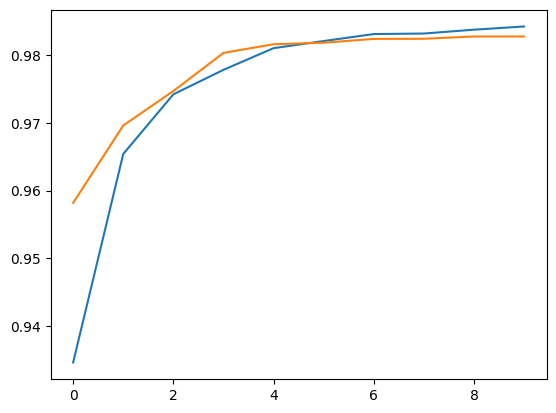

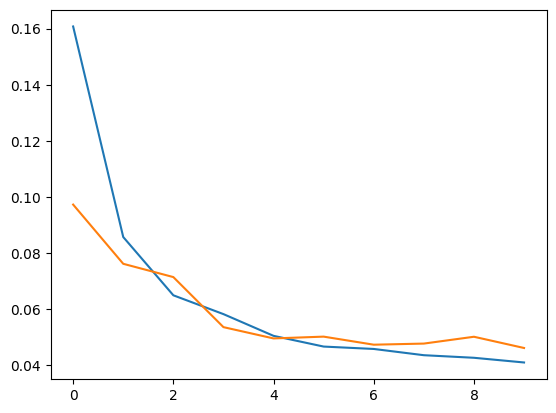

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save("model.h5") 

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: